# Time series analysis

In [1]:
import pandas as pd
from dasai.helpers import get_cleaned_data_path
# read parquet
df = pd.read_parquet('..' / get_cleaned_data_path() / 'AAPL.parquet')

In [2]:
df

,adjusted_close
date,
2023-02-15,155.330000
2023-02-14,153.200000
2023-02-13,153.850000
2023-02-10,151.010000
2023-02-09,150.640563
...,...
2018-02-26,42.596219
2018-02-23,41.770333
2018-02-22,41.056310


In [31]:
from prophet import Prophet

df_prophet = df.reset_index().rename(columns={'date': 'ds', 'adjusted_close': 'y'})
# only the first 3 years of this data is used
date = '2023-01-07'
df_train = df_prophet[df_prophet['ds'] < date]
df_test = df_prophet[df_prophet['ds'] >= date]
m = Prophet()
m.fit(df_train)
# select 2018-03
df_train = df_train[df_train['ds'] >= '2018-03-27']
df_train.tail()

16:41:41 - cmdstanpy - INFO - Chain [1] start processing
16:41:42 - cmdstanpy - INFO - Chain [1] done processing


,ds,y
1227,2018-04-03,40.078099
1228,2018-04-02,39.671106
1229,2018-03-29,39.932914
1230,2018-03-28,39.623504
1231,2018-03-27,40.066198


In [25]:
# transform df_prophet so that last value of each month is used
df_monthly = df_prophet.set_index('ds').resample('M').last().reset_index()
df_monthly

,ds,y
0,2018-02,40.901605
1,2018-03,41.651329
2,2018-04,39.671106
3,2018-05,40.247084
4,2018-06,45.453830
...,...,...
56,2022-10,141.818066
57,2022-11,149.981689
58,2022-12,147.897481
59,2023-01,124.879798


(19366.0, 19390.0)

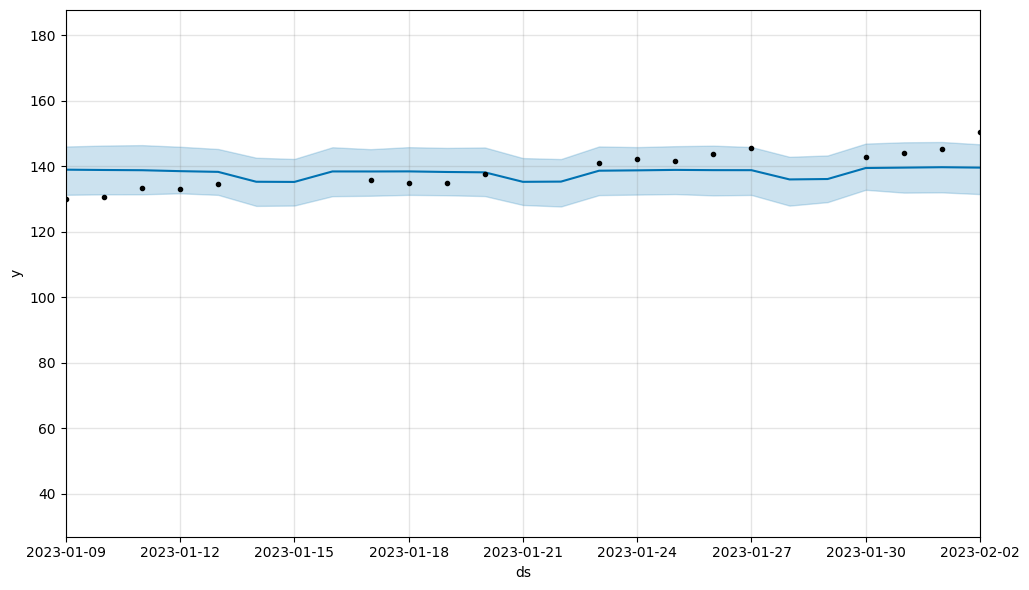

In [19]:
import matplotlib.pyplot as plt

future = m.make_future_dataframe(periods=len(df_test), freq='D', include_history=False)
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig1.gca().plot(df_test['ds'], df_test['y'], 'k.')
plt.xlim((df_test['ds'].min(), forecast['ds'].max()))

In [20]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
22,2023-01-29,136.147699,129.120416,143.903366
23,2023-01-30,139.509839,132.632866,146.528319
24,2023-01-31,139.629087,132.508814,147.295233
25,2023-02-01,139.752291,132.513088,147.060556
26,2023-02-02,139.631712,132.224481,147.162690


In [21]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

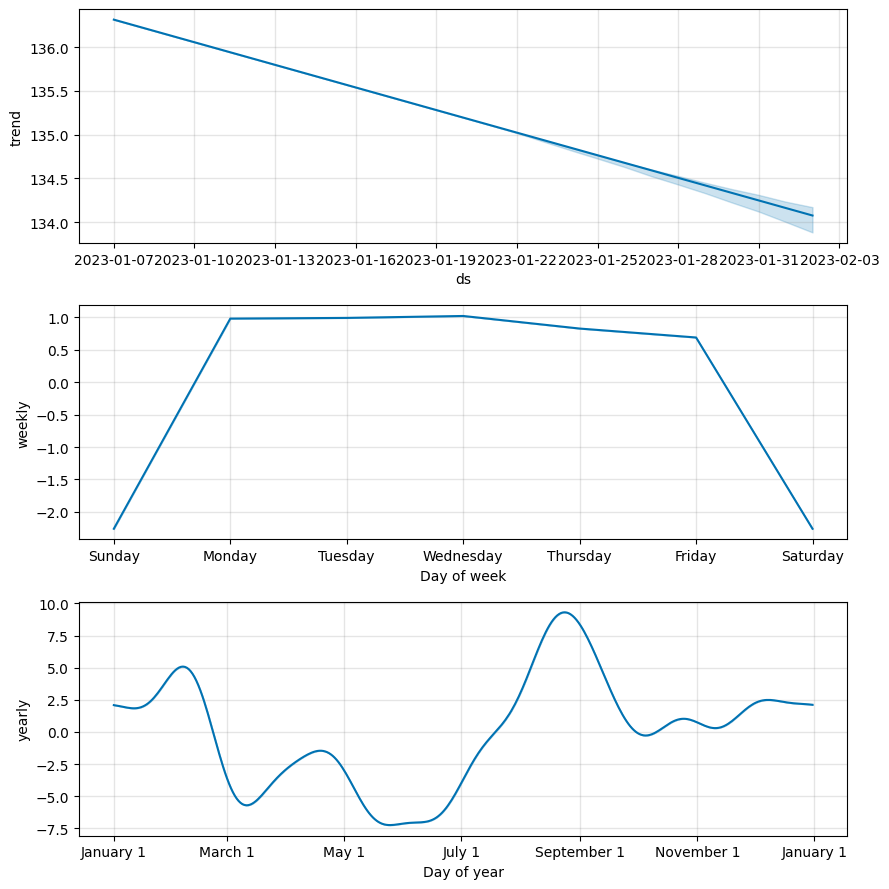

In [23]:
# only plot forecast
fig2 = m.plot_components(forecast)


C:\Users\migge\AppData\Local\Temp\ipykernel_12692\1912878217.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df['2020-01-01':'2020-12-31'].plot(figsize=(20, 10), title='AAPL')


<Axes: title={'center': 'AAPL'}, xlabel='date'>

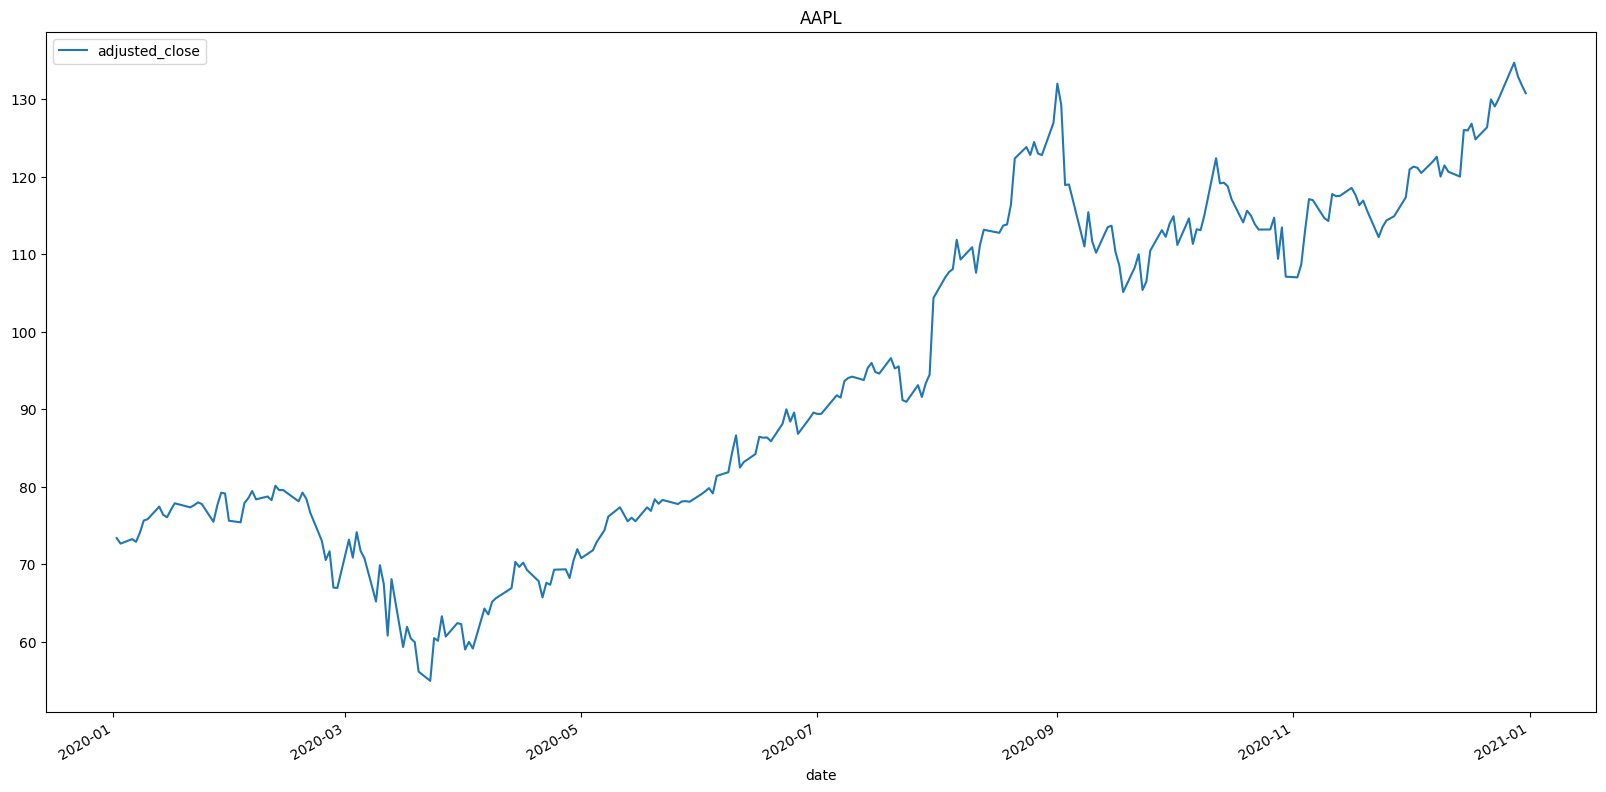

In [45]:
# plot 2020-01 till 2020-12 from df
df['2020-01-01':'2020-12-31'].plot(figsize=(20, 10), title='AAPL')